In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [138]:
directory = '/content/drive/My Drive/data_ventes'
files = os.listdir(directory)
print(files)

['Sales_February_2019.csv', 'Sales_April_2019.csv', 'Sales_December_2019.csv', 'Sales_August_2019.csv', 'Sales_January_2019.csv', 'Sales_October_2019.csv', 'Sales_June_2019.csv', 'Sales_November_2019.csv', 'Sales_September_2019.csv', 'Sales_July_2019.csv', 'Sales_May_2019.csv', 'Sales_March_2019.csv', 'all_data.csv']


In [139]:
all_data=pd.DataFrame()
for i in files:
  d=pd.read_csv(directory+'/'+i)
  all_data=pd.concat([all_data,d])

In [140]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [141]:
all_data.to_csv(directory+'/all_data.csv', index=False)

In [142]:
all_data.isnull().sum()

Order ID            2180
Product             2180
Quantity Ordered    2180
Price Each          2180
Order Date          2180
Purchase Address    2180
dtype: int64

In [143]:
all_data.shape

(747400, 6)

In [144]:
all_data.dropna(how='all', inplace=True)

In [145]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [146]:
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [147]:
def month(x):
  month=x.split('/')[0]
  return month

In [148]:
all_data['month']=all_data['Order Date'].apply(lambda x: month(x))

In [149]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",02
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",02
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",02
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",02
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",02


In [150]:
all_data['Price Each']

0            700
1           3.84
2         389.99
3          14.95
4           3.84
           ...  
560545     14.95
560546    149.99
560547      2.99
560548       700
560549     14.95
Name: Price Each, Length: 745220, dtype: object

In [151]:
all_data['Quantity Ordered'].iloc[1480]

'Quantity Ordered'

In [152]:
all_data[all_data['Price Each']=='Price Each']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
1483,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
1904,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
2050,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
2225,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
3091,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
...,...,...,...,...,...,...,...
558805,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
559097,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
559557,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
559740,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date


In [153]:
all_data[all_data['Quantity Ordered']=='Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
1483,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
1904,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
2050,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
2225,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
3091,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
...,...,...,...,...,...,...,...
558805,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
559097,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
559557,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
559740,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date


In [154]:
all_data.replace('Quantity Ordered', np.nan, inplace=True)

In [155]:
all_data[all_data['Quantity Ordered']=='Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month


In [156]:
all_data.isnull().sum()

Order ID               0
Product                0
Quantity Ordered    1420
Price Each             0
Order Date             0
Purchase Address       0
month                  0
dtype: int64

In [157]:
all_data.dropna(inplace=True)

In [158]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)

In [159]:
all_data['Total Price']=all_data['Price Each']*all_data['Quantity Ordered']

In [160]:
all_data.groupby('month')['Total Price'].sum()

month
01     7289026.92
02     8808089.68
03    11228401.52
04    13562680.96
05    12610427.00
06    10311209.04
07    10591103.04
08     8977871.52
09     8390240.52
10    14946907.52
11    12798412.80
12    18453773.36
Name: Total Price, dtype: float64

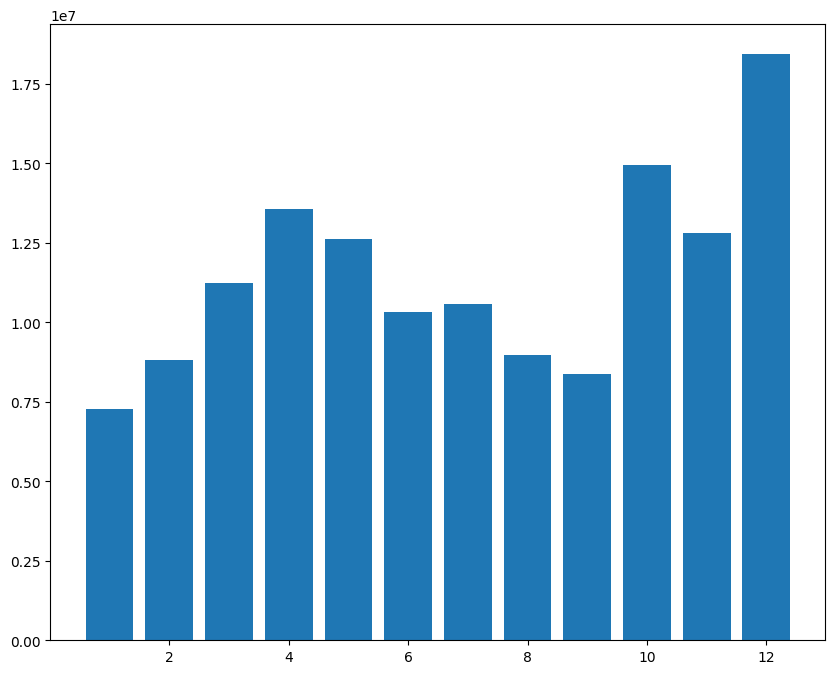

In [161]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(1,13),all_data.groupby('month')['Total Price'].sum() )
plt.show()

In [162]:
all_data['ville']=all_data['Purchase Address'].apply(lambda x: x.split(',')[1] )

In [163]:
all_data['ville']

0               Portland
1          San Francisco
2          New York City
3                Atlanta
4                Seattle
               ...      
560545     San Francisco
560546     San Francisco
560547       Los Angeles
560548     San Francisco
560549     San Francisco
Name: ville, Length: 743800, dtype: object

In [164]:
all_data['ville'].value_counts(normalize=True)

ville
 San Francisco    0.240559
 Los Angeles      0.159209
 New York City    0.133778
 Boston           0.107201
 Atlanta          0.080027
 Dallas           0.079699
 Seattle          0.079226
 Portland         0.067034
 Austin           0.053267
Name: proportion, dtype: float64

In [165]:
all_data['ville'].value_counts(normalize=True).index

Index([' San Francisco', ' Los Angeles', ' New York City', ' Boston',
       ' Atlanta', ' Dallas', ' Seattle', ' Portland', ' Austin'],
      dtype='object', name='ville')

In [166]:
all_data.groupby('ville').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total Price
ville,,,,,,,,
Atlanta,59524,59524,59524,59524,59524,59524,59524,59524
Austin,39620,39620,39620,39620,39620,39620,39620,39620
Boston,79736,79736,79736,79736,79736,79736,79736,79736
Dallas,59280,59280,59280,59280,59280,59280,59280,59280
Los Angeles,118420,118420,118420,118420,118420,118420,118420,118420
New York City,99504,99504,99504,99504,99504,99504,99504,99504
Portland,49860,49860,49860,49860,49860,49860,49860,49860
San Francisco,178928,178928,178928,178928,178928,178928,178928,178928
Seattle,58928,58928,58928,58928,58928,58928,58928,58928


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ' San Francisco'),
  Text(1, 0, ' Los Angeles'),
  Text(2, 0, ' New York City'),
  Text(3, 0, ' Boston'),
  Text(4, 0, ' Atlanta'),
  Text(5, 0, ' Dallas'),
  Text(6, 0, ' Seattle'),
  Text(7, 0, ' Portland'),
  Text(8, 0, ' Austin')])

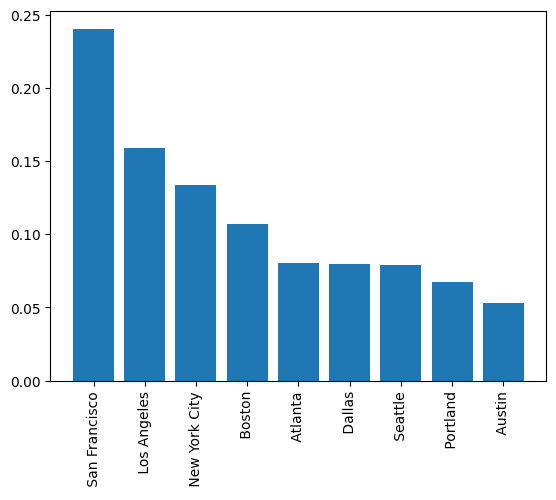

In [167]:
plt.bar(all_data['ville'].value_counts(normalize=True).index,all_data['ville'].value_counts(normalize=True))
plt.xticks(rotation='vertical')

In [168]:
all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour

<ipython-input-168-964a8f7a51c5>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour


In [169]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total Price,ville,Hour
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",02,700.00,Portland,1
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",02,3.84,San Francisco,7
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",02,389.99,New York City,9
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",02,14.95,Atlanta,16
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",02,7.68,Seattle,20


In [170]:
all_data.groupby('Hour')['Hour'].count()

Hour
0     15640
1      9400
2      4972
3      3324
4      3416
5      5284
6      9928
7     16044
8     25024
9     34992
10    43776
11    49644
12    50348
13    48516
14    43936
15    40700
16    41536
17    43596
18    49120
19    51620
20    48912
21    43684
22    35288
23    25100
Name: Hour, dtype: int64

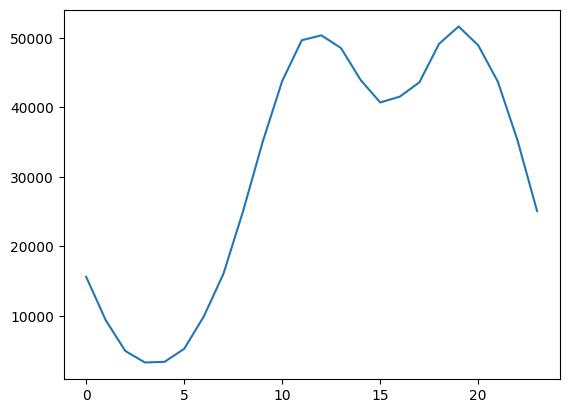

In [171]:
plt.plot(np.arange(0,24), all_data.groupby('Hour')['Hour'].count())

In [172]:
top_products=all_data.groupby('Product')['Quantity Ordered'].sum()

In [173]:
top_products.index

Index(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'],
      dtype='object', name='Product')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '20in Monitor'),
  Text(1, 0, '27in 4K Gaming Monitor'),
  Text(2, 0, '27in FHD Monitor'),
  Text(3, 0, '34in Ultrawide Monitor'),
  Text(4, 0, 'AA Batteries (4-pack)'),
  Text(5, 0, 'AAA Batteries (4-pack)'),
  Text(6, 0, 'Apple Airpods Headphones'),
  Text(7, 0, 'Bose SoundSport Headphones'),
  Text(8, 0, 'Flatscreen TV'),
  Text(9, 0, 'Google Phone'),
  Text(10, 0, 'LG Dryer'),
  Text(11, 0, 'LG Washing Machine'),
  Text(12, 0, 'Lightning Charging Cable'),
  Text(13, 0, 'Macbook Pro Laptop'),
  Text(14, 0, 'ThinkPad Laptop'),
  Text(15, 0, 'USB-C Charging Cable'),
  Text(16, 0, 'Vareebadd Phone'),
  Text(17, 0, 'Wired Headphones'),
  Text(18, 0, 'iPhone')])

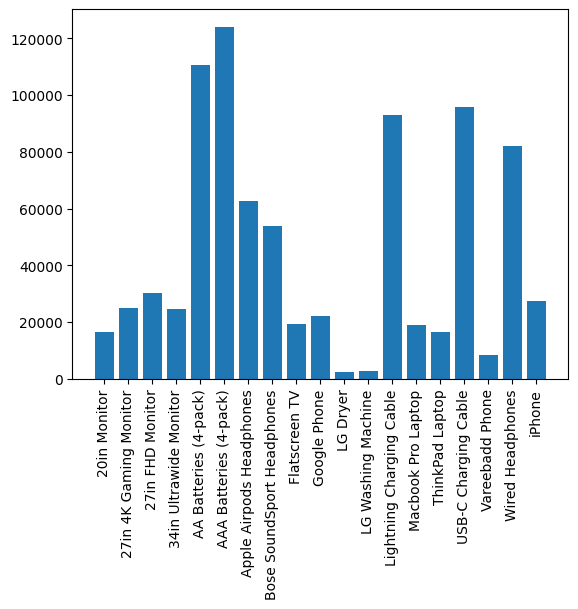

In [174]:
plt.bar(top_products.index,top_products)
plt.xticks(rotation='vertical')

In [175]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '20in Monitor'),
  Text(1, 0, '27in 4K Gaming Monitor'),
  Text(2, 0, '27in FHD Monitor'),
  Text(3, 0, '34in Ultrawide Monitor'),
  Text(4, 0, 'AA Batteries (4-pack)'),
  Text(5, 0, 'AAA Batteries (4-pack)'),
  Text(6, 0, 'Apple Airpods Headphones'),
  Text(7, 0, 'Bose SoundSport Headphones'),
  Text(8, 0, 'Flatscreen TV'),
  Text(9, 0, 'Google Phone'),
  Text(10, 0, 'LG Dryer'),
  Text(11, 0, 'LG Washing Machine'),
  Text(12, 0, 'Lightning Charging Cable'),
  Text(13, 0, 'Macbook Pro Laptop'),
  Text(14, 0, 'ThinkPad Laptop'),
  Text(15, 0, 'USB-C Charging Cable'),
  Text(16, 0, 'Vareebadd Phone'),
  Text(17, 0, 'Wired Headphones'),
  Text(18, 0, 'iPhone')])

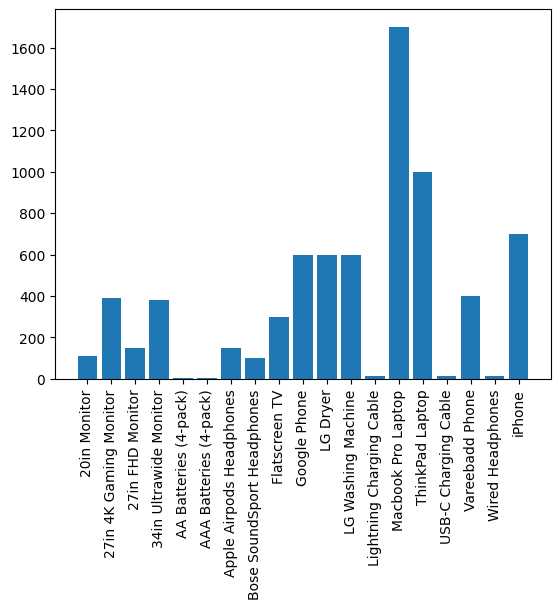

In [176]:
plt.bar(top_products.index, all_data.groupby('Product')['Price Each'].mean())
plt.xticks(rotation='vertical')

<ipython-input-177-a7bf4b4cfb51>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_products.index,rotation='vertical')


<Figure size 2000x800 with 0 Axes>

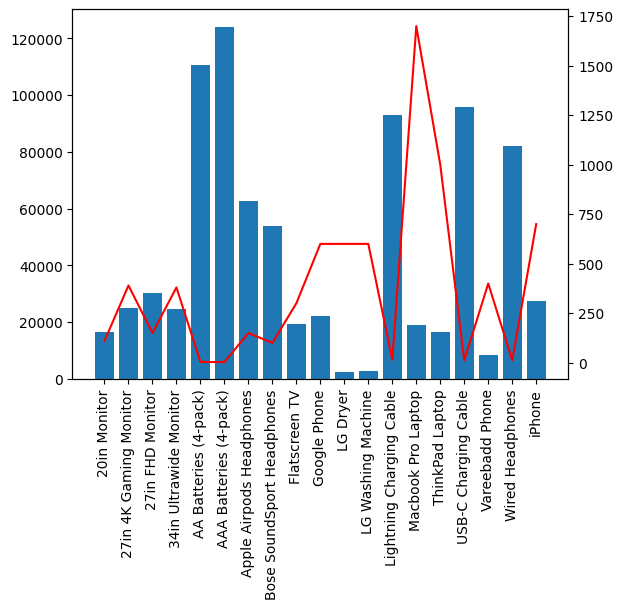

In [177]:
plt.figure(figsize=(20,8))
fig, ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(top_products.index, top_products)
ax2.plot(top_products.index,all_data.groupby('Product')['Price Each'].mean(), color='r')
ax1.set_xticklabels(top_products.index,rotation='vertical')
plt.show()

In [178]:
all_data.shape

(743800, 10)

In [179]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total Price,ville,Hour
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",02,700.00,Portland,1
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",02,3.84,San Francisco,7
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",02,389.99,New York City,9
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",02,14.95,Atlanta,16
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",02,7.68,Seattle,20
...,...,...,...,...,...,...,...,...,...,...
560545,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016",03,14.95,San Francisco,11
560546,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016",03,149.99,San Francisco,20
560547,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001",03,8.97,Los Angeles,10
560548,176557,iPhone,1,700.00,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016",03,700.00,San Francisco,12


In [180]:
all_data['Order ID'].unique().shape

(178437,)

In [181]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]

In [182]:
df['grouped']=df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

In [183]:
df.shape

(743800, 11)

In [184]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total Price,ville,Hour,grouped
560545,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016",03,14.95,San Francisco,11,"Lightning Charging Cable,Lightning Charging Ca..."
560546,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016",03,149.99,San Francisco,20,"27in FHD Monitor,27in FHD Monitor,27in FHD Mon..."
560547,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001",03,8.97,Los Angeles,10,"AAA Batteries (4-pack),AAA Batteries (4-pack),..."
560548,176557,iPhone,1,700.00,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016",03,700.00,San Francisco,12,"iPhone,Lightning Charging Cable,iPhone,Lightni..."
560549,176557,Lightning Charging Cable,1,14.95,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016",03,14.95,San Francisco,12,"iPhone,Lightning Charging Cable,iPhone,Lightni..."


In [134]:
df.drop_duplicates(subset='Order ID')['grouped'].value_counts()

grouped
Lightning Charging Cable,Lightning Charging Cable,Lightning Charging Cable                                                                                                          19831
AAA Batteries (4-pack),AAA Batteries (4-pack),AAA Batteries (4-pack)                                                                                                                19826
AA Batteries (4-pack),AA Batteries (4-pack),AA Batteries (4-pack)                                                                                                                   19809
USB-C Charging Cable,USB-C Charging Cable,USB-C Charging Cable                                                                                                                      19792
Wired Headphones,Wired Headphones,Wired Headphones                                                                                                                                  17208
                                                              

In [137]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total Price,ville,Hour,grouped
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",02,700.00,Portland,1,"iPhone,iPhone,iPhone"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",02,3.84,San Francisco,7,"AA Batteries (4-pack),AA Batteries (4-pack),AA..."
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",02,389.99,New York City,9,"27in 4K Gaming Monitor,27in 4K Gaming Monitor,..."
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",02,14.95,Atlanta,16,"Lightning Charging Cable,Lightning Charging Ca..."
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",02,7.68,Seattle,20,"AA Batteries (4-pack),AA Batteries (4-pack),AA..."
...,...,...,...,...,...,...,...,...,...,...,...
373695,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016",03,14.95,San Francisco,11,"Lightning Charging Cable,Lightning Charging Ca..."
373696,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016",03,149.99,San Francisco,20,"27in FHD Monitor,27in FHD Monitor,27in FHD Mon..."
373697,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001",03,8.97,Los Angeles,10,"AAA Batteries (4-pack),AAA Batteries (4-pack),..."
373698,176557,iPhone,1,700.00,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016",03,700.00,San Francisco,12,"iPhone,Lightning Charging Cable,iPhone,Lightni..."
